In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sb
import math 
import sklearn.metrics
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
d=pd.read_csv("delivery_time.csv")

In [3]:
d.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [42]:
d.tail()

,dt,st
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
d.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


## Correlation

In [6]:
d.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

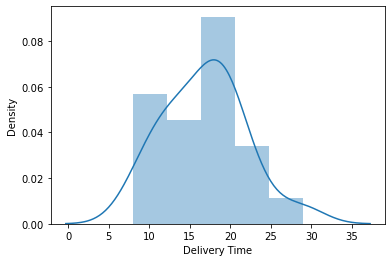

In [7]:
sb.distplot(d["Delivery Time"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

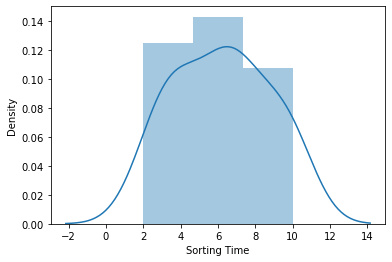

In [8]:
sb.distplot(d["Sorting Time"])

In [9]:
d.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [10]:
d.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

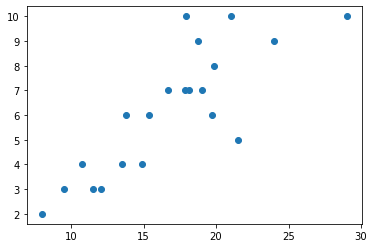

In [11]:
plt.scatter(x="Delivery Time",y="Sorting Time",data=d)

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

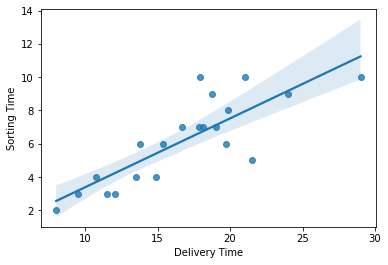

In [12]:
sb.regplot(x="Delivery Time",y="Sorting Time",data=d)

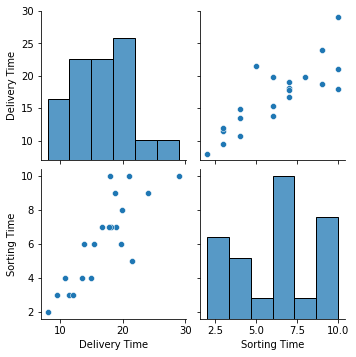

In [13]:
sb.pairplot(d)

In [14]:
d=d.rename({"Delivery Time":"delivery_time","Sorting Time":"sorting_time"},axis=1)

## Model Building and Model Training

In [15]:
import statsmodels.formula.api as smf

In [16]:
model = smf.ols("delivery_time~sorting_time",data=d).fit()

In [17]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [18]:
model.tvalues,model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

## As p value is much lessar than (0.5) we can say there is a good correlation between variables. 

## Model Testing

In [19]:
print(1.649020*4+6.582734)
print(1.649020*15+6.582734)

13.178814
31.318033999999997


## Machine Prediction

In [20]:
pred_data={"sorting_time":[1.1,2.3,3.5,7.4,11.5,12.7]}
pred_data

{'sorting_time': [1.1, 2.3, 3.5, 7.4, 11.5, 12.7]}

In [21]:
test_data=pd.DataFrame(pred_data)
test_data

,sorting_time
0,1.1
1,2.3
2,3.5
3,7.4
4,11.5
5,12.7


In [22]:
model.predict(test_data)

0     8.396656
1    10.375480
2    12.354304
3    18.785481
4    25.546463
5    27.525287
dtype: float64

In [23]:
test_data_a=pd.DataFrame(d,columns=["sorting_time"])
test_data_a.head(5)

,sorting_time
0,10
1,4
2,6
3,9
4,10


In [24]:
pred_data_a=model.predict(test_data_a)
pred_data_a

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [38]:
d.rename(columns={'sorting_time':'st','delivery_time':'dt'},inplace=True)
d

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [41]:
d_final=pd.get_dummies(data=d,columns=['st'])
d_final.head()

,dt,st_2,st_3,st_4,st_5,st_6,st_7,st_8,st_9,st_10
0,21.00,0,0,0,0,0,0,0,0,1
1,13.50,0,0,1,0,0,0,0,0,0
2,19.75,0,0,0,0,1,0,0,0,0
3,24.00,0,0,0,0,0,0,0,1,0
4,29.00,0,0,0,0,0,0,0,0,1


In [46]:
d_final['t']=np.arange(0,21)
d_final['t_sqr']=d_final['t']*d_final['t']
d_final['log_dt']=np.log(d_final['dt'])
d_final.head()

,dt,st_2,st_3,st_4,st_5,st_6,st_7,st_8,st_9,st_10,t,t_sqr,log_dt
0,21.00,0,0,0,0,0,0,0,0,1,0,0,3.044522
1,13.50,0,0,1,0,0,0,0,0,0,1,1,2.602690
2,19.75,0,0,0,0,1,0,0,0,0,2,4,2.983153
3,24.00,0,0,0,0,0,0,0,1,0,3,9,3.178054
4,29.00,0,0,0,0,0,0,0,0,1,4,16,3.367296


## Splitting the Data

In [48]:
train=d_final.head(15)
test=d_final.tail(6)

In [54]:
def RMSE(org,pred):
    rmse=np.sqrt(np.mean(np.array(org)-np.array(pred))**2)
    return rmse

## Linear model

In [56]:
import statsmodels.formula.api as smf
linear_model=smf.ols('dt~t',data=train).fit()
pred_lmodel=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_lmodel=RMSE(test['dt'],pred_lmodel)
rmse_lmodel

4.627958333333327

## Exponential Model

In [58]:
expo_model=smf.ols('log_dt~t',data=train).fit()
pred_expo_model=pd.Series(expo_model.predict(pd.DataFrame(test['t'])))
rmse_expo_model=RMSE(test['dt'],np.exp(pred_expo_model))
rmse_expo_model

4.217493648386687

## Quadratic Model

In [60]:
q_model=smf.ols('dt~t+t_sqr',data=train).fit()
pred_q_model=pd.Series(q_model.predict(pd.DataFrame(test[['t','t_sqr']])))
rmse_q_model=RMSE(test['dt'],pred_q_model)
rmse_q_model

9.852870663649957

## Additive Seasonality Model

In [62]:
asm_model=smf.ols('dt~st_2+st_3+st_4+st_5+st_6+st_7+st_8+st_9+st_10',data=train).fit()
pred_asm_model=pd.Series(asm_model.predict(pd.DataFrame(test[['st_2','st_3','st_4','st_5','st_6','st_7','st_8','st_9','st_10']])))
rmse_asm_model=RMSE(test['dt'],pred_asm_model)
rmse_asm_model

0.31263888888888935

## Additive Seasonality Quadratic Model

In [63]:
asqm_model=smf.ols('dt~t+t_sqr+st_2+st_3+st_4+st_5+st_6+st_7+st_8+st_9+st_10',data=train).fit()
pred_asqm_model=pd.Series(asqm_model.predict(pd.DataFrame(test[['t','t_sqr','st_2','st_3','st_4','st_5','st_6','st_7','st_8','st_9','st_10']])))
rmse_asqm_model=RMSE(test['dt'],pred_asqm_model)
rmse_asqm_model

0.23327191228465338

## Multiplicative Seasonality Model

In [64]:
msm_model=smf.ols('log_dt~st_2+st_3+st_4+st_5+st_6+st_7+st_8+st_9+st_10',data=train).fit()
pred_msm_model=pd.Series(msm_model.predict(pd.DataFrame(test[['st_2','st_3','st_4','st_5','st_6','st_7','st_8','st_9','st_10']])))
rmse_msm_model=RMSE(test['dt'],np.exp(pred_msm_model))
rmse_msm_model

0.8938930825676614

## Multiplicatice Additive Seasonality Model

In [65]:
masm_model=smf.ols('log_dt~t+t_sqr+st_2+st_3+st_4+st_5+st_6+st_7+st_8+st_9+st_10',data=train).fit()
pred_masm_model=pd.Series(masm_model.predict(pd.DataFrame(test[['t','t_sqr','st_2','st_3','st_4','st_5','st_6','st_7','st_8','st_9','st_10']])))
rmse_masm_model=RMSE(test['dt'],np.exp(pred_masm_model))
rmse_masm_model

1.0060387126181256

In [68]:
list=[['Linear model',rmse_lmodel],['Exponential Method',rmse_expo_model],
       ['Quadratic Method',rmse_q_model],['Add Seasonality Method',rmse_asm_model],['Add Seasonality Quad method',rmse_asqm_model],
      ['Muliti Seasonality Method',rmse_msm_model],['Multi add seasonality Method',rmse_masm_model]]
score=pd.DataFrame(list,columns=['Model','RMSE_values'])
score

,Model,RMSE_values
0,Linear model,4.627958
1,Exponential Method,4.217494
2,Quadratic Method,9.852871
3,Add Seasonality Method,0.312639
4,Add Seasonality Quad method,0.233272
5,Muliti Seasonality Method,0.893893
6,Multi add seasonality Method,1.006039


In [72]:
score.sort_values('RMSE_values')

,Model,RMSE_values
4,Add Seasonality Quad method,0.233272
3,Add Seasonality Method,0.312639
5,Muliti Seasonality Method,0.893893
6,Multi add seasonality Method,1.006039
1,Exponential Method,4.217494
0,Linear model,4.627958
2,Quadratic Method,9.852871


### By analizying the above we can understand that Additive Seasonality Quadratic Method has lowest rmse value

### Building a model on lowest RMSE value - Additive Seasonality Quadratic Method(exp_model)

In [74]:
d_final.head()

,dt,st_2,st_3,st_4,st_5,st_6,st_7,st_8,st_9,st_10,t,t_sqr,log_dt
0,21.00,0,0,0,0,0,0,0,0,1,0,0,3.044522
1,13.50,0,0,1,0,0,0,0,0,0,1,1,2.602690
2,19.75,0,0,0,0,1,0,0,0,0,2,4,2.983153
3,24.00,0,0,0,0,0,0,0,1,0,3,9,3.178054
4,29.00,0,0,0,0,0,0,0,0,1,4,16,3.367296


In [75]:
final_model=smf.ols('dt~t+t_sqr+st_2+st_3+st_4+st_5+st_6+st_7+st_8+st_9+st_10',data=d_final).fit()
pred_final=pd.Series(final_model.predict(pd.DataFrame(d_final[['t','t_sqr','st_2','st_3','st_4','st_5','st_6','st_7','st_8','st_9','st_10']])))
rmse_final=RMSE(d_final['dt'],pred_final)
rmse_final

2.0867963441906753e-13

In [76]:
pred_df=pd.DataFrame({'Actual':d_final.dt,'Predicted':pred_final})
pred_df

,Actual,Predicted
0,21.00,24.297772
1,13.50,14.986736
2,19.75,17.439037
3,24.00,22.261901
4,29.00,22.392381
5,15.35,16.213297
6,19.00,18.281226
7,9.50,11.455276
8,17.90,21.209847
9,18.75,20.488099
